## import libraries

In [134]:
import pandas as pd 
import requests
from pandas_profiling import ProfileReport

from geopy.geocoders import Nominatim 

# Maps visualization
import folium
import numpy as np
import plotly.express as px

import geopandas
import matplotlib.pyplot as plt

## Load data

In [2]:
df = pd.read_csv('clean_london_data.csv')

In [87]:
london_boroughs = pd.read_csv('clean_london_data.csv')

## Getting Venue Data with Forsquare API

In [5]:
CLIENT_ID = 'AIGPMW4KUAC351NMMXSGN4DPOTEXFTNBYSFV014YF3RE3FP5' # your Foursquare ID
CLIENT_SECRET = 'CY4SAG4M24EIB1NKVLUABAC2RUNNF53R0CBMKWTS3VUR5A3Q' # your Foursquare Secret
VERSION = '20220219'
LIMIT = 200

def getNearbyVenues(names, latitudes, longitudes, radius=2000,limit=200):

    URL= "https://api.foursquare.com/v3/places/nearby?ll={},{}&radius={}&limit=50&query=cafe"
    headers = {
        "Accept": "application/json",
        "Authorization": "fsq3Kdw1wp8+nAIcoOufls8EEFWG1ZTn43UcY0LQuY+zK30="
    }

    df_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        url = URL.format(lat, lng, radius, LIMIT)
        results = requests.request("GET", url, headers=headers).json()
        for each_result in results['results']: # filter the result based on JSON identification
            result={}
            result['Borough']=name
            result['Neighborhood Latitude']=lat
            result['Neighborhood Longitude']=lng
            result['Name']=each_result['name']
            result['Venue Latitude']=each_result['geocodes']['main']['latitude']
            result['Venue Longitude']=each_result['geocodes']['main']['longitude']


            #result['Locality']=each_result['location']['locality']
            result['Category_Names']=[each_name['name'] for each_name in each_result['categories']]


            df_list.append(result.copy())
    return pd.DataFrame(df_list) # return dataframe

In [6]:

# call the function
df_result=getNearbyVenues(df['Borough'],df['latitude'],df['longitude'])



> Here we want to check if we get venues from all the London boroughs.

In [14]:
df['Borough'].nunique()

32

In [13]:
df_result['Borough'].nunique()

32

## Merge the dataframes

In [15]:
# we will merge the dataframes relying on the Borough values
df = df.merge(df_result,on='Borough')


In [16]:
df.head()

,Unnamed: 0,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population_2019,Nr. in map,latitude,longitude,Neighborhood Latitude,Neighborhood Longitude,Name,Venue Latitude,Venue Longitude,Category_Names
0,0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,Morrisons Becontree Heath Cafe,51.560107,0.148194,[Café]
1,0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,Crowlands Cafe,51.574536,0.162048,[Snack Place]
2,0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,Cafe,51.560870,0.148821,[Café]
3,0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,Cafe on the Lake,51.555941,0.199447,"[Café, Restaurant]"
4,0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,M&S,51.577530,0.182214,[Retail]


In [17]:
# drop unused columns 
df.drop(['Unnamed: 0'], axis=1)

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population_2019,Nr. in map,latitude,longitude,Neighborhood Latitude,Neighborhood Longitude,Name,Venue Latitude,Venue Longitude,Category_Names
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,Morrisons Becontree Heath Cafe,51.560107,0.148194,[Café]
1,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,Crowlands Cafe,51.574536,0.162048,[Snack Place]
2,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,Cafe,51.560870,0.148821,[Café]
3,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,Cafe on the Lake,51.555941,0.199447,"[Café, Restaurant]"
4,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,25,51.5607,0.1557,51.5607,0.1557,M&S,51.577530,0.182214,[Retail]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,261317,2,51.4973,0.1372,51.4973,0.1372,Timber Lodge Cafe,51.547458,-0.015077,[Café]
1499,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,261317,2,51.4973,0.1372,51.4973,0.1372,The Cafe in the Crypt,51.508962,-0.126729,"[Café, Restaurant]"
1500,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,261317,2,51.4973,0.1372,51.4973,0.1372,Hard Rock Cafe - Park Lane,51.503854,-0.149063,[American Restaurant]
1501,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,261317,2,51.4973,0.1372,51.4973,0.1372,Jones Diary Cafe,51.512513,-0.105961,[Café]


## Visualising and Understanding the Data

In [48]:
from geopy.geocoders import Nominatim
nominatim_service = Nominatim(user_agent='sarah.a.alharbi@gmail.com')


# Read the GeoJSON file  
boroughs_json= r'london.json'

# Create a Map for London


london_coordinates = nominatim_service.geocode('London, UK')
london_map = folium.Map(location = [london_coordinates.latitude, london_coordinates.longitude], 
                        zoom_start=10)

# Create a Choropleth map for each Borough and respective population in 2010
london_map.choropleth(
    geo_data = boroughs_json,
    data =  df,
    columns = ['Borough','Population_2019'],
    key_on = 'feature.properties.name',
    fill_color="Blues",
    fill_opacity = 0.8,
    line_opacity = 0.8,
    legend_name = 'London Boroughs Population')

# In the below part, we create an overlay to add Popups to the map that displays 
# Borough name and Total Population

# Open Geo
# View the map
london_map



/usr/local/lib/python3.9/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [59]:
 r'london.json'

'london.json'

In [75]:
nominatim_service = Nominatim(user_agent='sarah.a.alharbi@gmail.com')
# Create a Map for London


london_coordinates = nominatim_service.geocode('London, UK')
london_map = folium.Map(location = [london_coordinates.latitude, london_coordinates.longitude], 
                        zoom_start=10)

# Create a Choropleth map for each Borough and respective population in 2010
map1 = folium.Choropleth(
    geo_data = boroughs_json,
    data =  df,
    columns = ['Borough','Population_2019'],
    key_on = 'feature.properties.name',
    fill_color="YlGnBu",
    fill_opacity = 0.7,
    line_opacity = 0.8,
    reset=True,
    highlight=True,
    legend_name = 'London Boroughs Population').add_to(london_map)

# In the below part, we create an overlay to add Popups to the map that displays 
# Borough name and Total Population

# Open Geo
# View the map


map1.geojson.add_child(
    folium.features.GeoJsonTooltip(fields= ['name','pop_2001'],
                                   aliases=['Borough:', 'Population_2019:'],
                                   labels=True,
                                   localize=True,
                                   sticky=False,
                                   style="""
                                   background-color: #F0EFEF;
                                   border: 2px solid black;
                                   border-radius: 3px;
                                   box-shadow: 3px;
                                   """,)
)

london_map



### Issues:

- The population values in the geojson file is outdated since 2001, while in the scarpped data I've the popualtion values of 2019.

- The City of London is a city, ceremonial county and local government district that contains the historic centre and the primary central business district (CBD) of London.

In [72]:
UK = json.load(open("london.json", "r"))


## Bar chart 

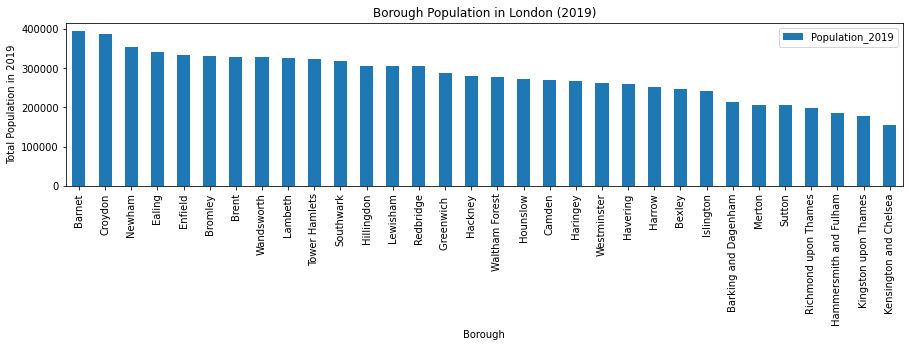

In [94]:
# Create a Bar chart to plot each Borough's population

bar1 = london_boroughs.sort_values(by='Population_2019', ascending=False).plot(kind='bar', 
                                                         x='Borough', y='Population_2019', figsize=(15, 3));
# Title and axis labels
bar1.set_title("Borough Population in London (2019)");
bar1.set_xlabel("Borough");
bar1.set_ylabel("Total Population in 2019");



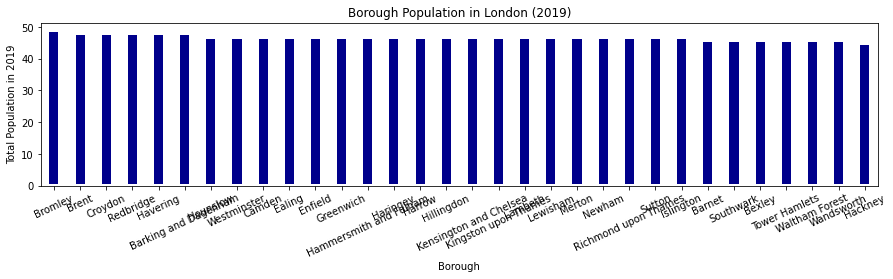

In [131]:
# create bar chart of borough and number of cafes
bar2 = df.Borough.value_counts(ascending=False).plot(kind = 'bar',figsize=(15, 3), color='darkblue', rot= 25, linewidth = 4, edgecolor='white')                                   
# Title and axis labels
bar2.set_title("Borough Population in London (2019)");
bar2.set_xlabel("Borough" );
bar2.set_ylabel("Total Population in 2019");
#counts.sort_values(ascending=False).plot(kind='bar', color='darkblue')
#plt.xticks()

In [132]:
df.Borough.value_counts()

Bromley                   49
Brent                     48
Croydon                   48
Redbridge                 48
Havering                  48
Barking and Dagenham      48
Hounslow                  47
Westminster               47
Camden                    47
Ealing                    47
Enfield                   47
Greenwich                 47
Hammersmith and Fulham    47
Haringey                  47
Harrow                    47
Hillingdon                47
Kensington and Chelsea    47
Kingston upon Thames      47
Lambeth                   47
Lewisham                  47
Merton                    47
Newham                    47
Richmond upon Thames      47
Sutton                    47
Islington                 47
Barnet                    46
Southwark                 46
Bexley                    46
Tower Hamlets             46
Waltham Forest            46
Wandsworth                46
Hackney                   45
Name: Borough, dtype: Int64

In [133]:
df.Category_Names.value_counts() 

# some of the cafe have different categories - encoding  

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Café]                                              262
[Café, Restaurant]                                  219
[Café, Coffee Shop]                                  83
[Restaurant]                                         65
[Café, Coffee Shop, Restaurant]                      59
[Pizzeria]                                           55
[American Restaurant]                                50
[Coffee Shop, Restaurant]                            42
[Café, Coffee Shop, Fast Food Restaurant]            38
[Café, Turkish Restaurant]                           33
[Café, Deli, Middle Eastern Restaurant]              32
[Turkish Restaurant]                                 32
[Bar, Café, Restaurant]                              32
[Hotel]                                              32
[Café, Italian Restaurant]                           32
[Café, Coffee Shop, Japanese Restaurant]             32
[Concert Hall, Bar, Restaurant]                      31
[Chinese Restaurant, Malay Restaurant]          

# Haven't Finished it yet




- Boroughs that we should consider, based on population count:

- Boroughs that we should consider, based on population density:


## Feature need to be added:
- Density population/Area
- create a list for Competitors  

## Want to achieve 

-  Create a Dataframe with top 5 common cafe types for each neighbourhood "tea room, with a restaurant, so on.. "
- Clustering Neighbourhoods

We will use KMeans algorithm in order to cluster similar London neighbourhoods. Then, explore how many competitors by category. 

Recommendation each boroughs with the category 



In [44]:
df['Borough'] = df['Borough'].str.strip()


In [45]:
df["id"] = df["Borough"].apply(lambda x: state_id_map[x])


In [46]:
df.Borough = df.Borough.astype('string')


In [47]:
state_id_map = {}
for feature in UK["name"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]




KeyError: 'name'

In [41]:
fig = px.choropleth(
    df,
    locations="id",
    geojson= UK,
    color="Population_scale",
    hover_name="Borough",
    hover_data=["Population_scale"],
    title="London Population Density",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'Borough', 'Local authority', 'Political control', 'Headquarters', 'Area (sq mi)', 'Population_2019', 'Nr. in map', 'latitude', 'longitude', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Name', 'Venue Latitude', 'Venue Longitude', 'Category_Names'] but received: id

In [ ]:
df.dtypes